In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
sns.set_style('whitegrid')
pio.renderers.default = 'svg'
%matplotlib inline

In [3]:
!pip install -U kaleido
!pip install --upgrade kaleido
!pip install --upgrade plotly

In [4]:
!sudo apt update
!sudo apt-get install -y libnss3 libatk-bridge2.0-0 libcups2 libxcomposite1 libxcursor1 libxdamage1 libxext6 libxfixes3 libxi6 libxrandr2 libxrender1 libxss1 libxtst6

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
49 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as re

In [6]:
!plotly_get_chrome


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: None
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

Let's begin by examining the descriptive statistics of the numerical columns (math, reading, and writing scores) to understand their central tendency, spread, and distribution.

In [11]:
display(df.describe())

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Next, let's check for any missing values in the dataset. This is crucial for understanding the completeness of our data and deciding if any imputation or dropping of rows/columns is needed.

In [12]:
display(df.isnull().sum())

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


- Let's visualize the distribution of the math, reading, and writing scores using histograms to better understand their spread and frequency.

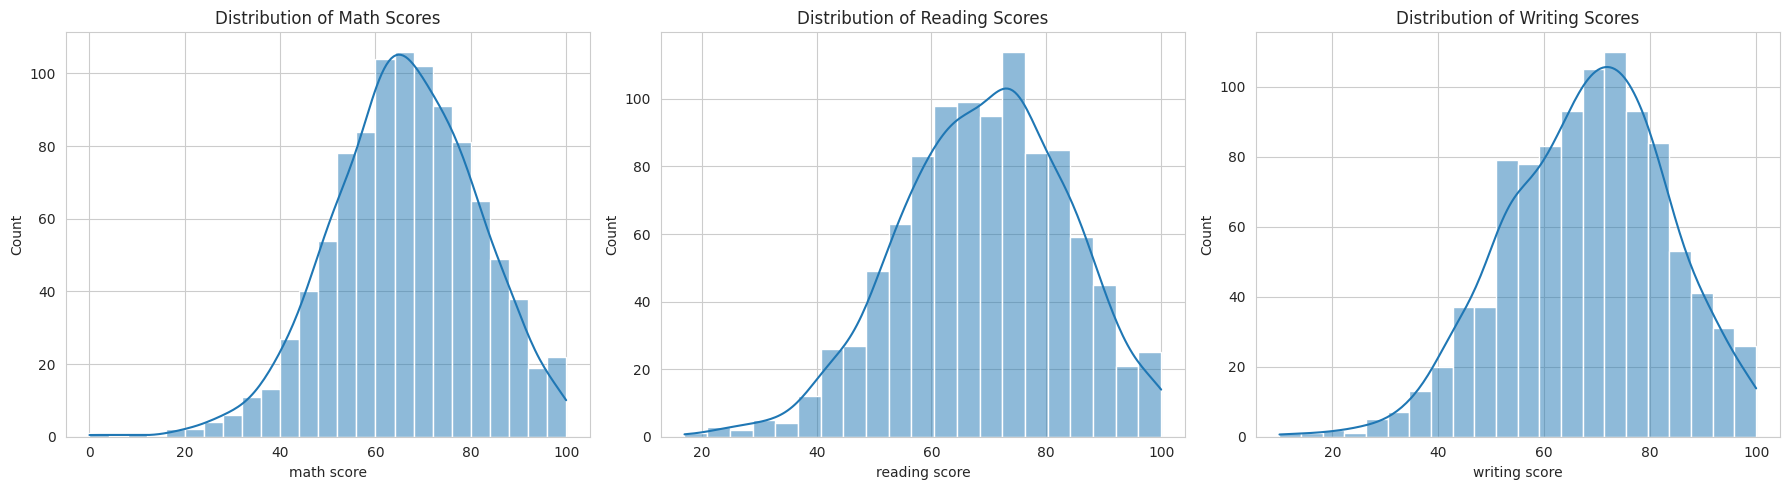

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True)
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True)
plt.title('Distribution of Writing Scores')

plt.tight_layout()
plt.show()

#Insights
Score Distributions: Math, reading, and writing scores are all roughly bell-shaped, indicating a somewhat normal distribution with most students scoring in the middle range.

- Let's examine the influence of 'gender' on student performance across the three subjects. Box plots are suitable for this as they show the distribution of scores for each gender, including the median, quartiles, and potential outliers.

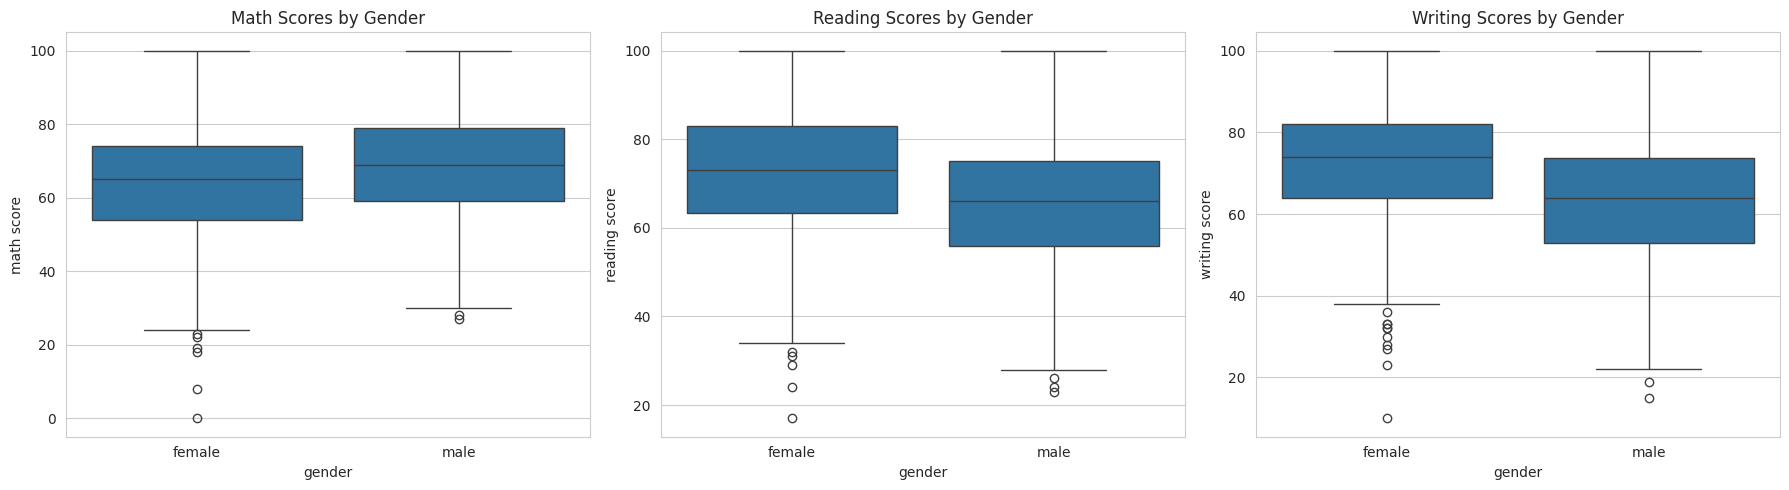

In [14]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Reading Scores by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Scores by Gender')

plt.tight_layout()
plt.show()

#Insights
Gender Impact: Female students tend to perform better in reading and writing, while male students show a slight edge in math.

- Now, let's investigate the impact of 'parental level of education' on student scores. We will use box plots to compare the distribution of math, reading, and writing scores across different parental education levels.



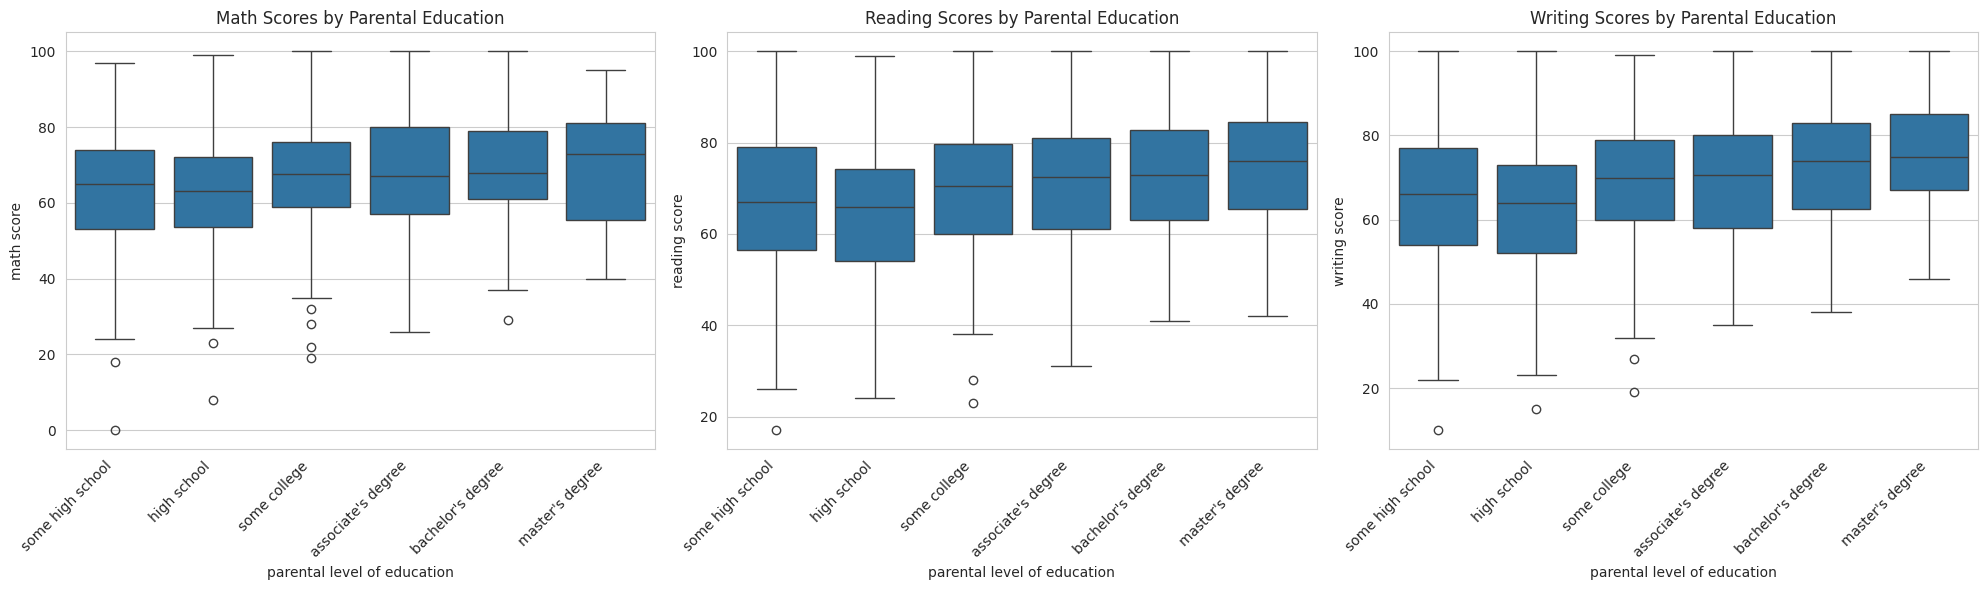

In [17]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='parental level of education', y='math score', data=df, order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Math Scores by Parental Education')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df, order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Reading Scores by Parental Education')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df, order=['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"])
plt.title('Writing Scores by Parental Education')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#Insights
Parental Education Impact: A higher parental level of education generally correlates with higher student scores across all subjects.

- Let's investigate the impact of 'lunch' on student scores. We will use box plots to compare the distribution of math, reading, and writing scores for students based on their lunch type.

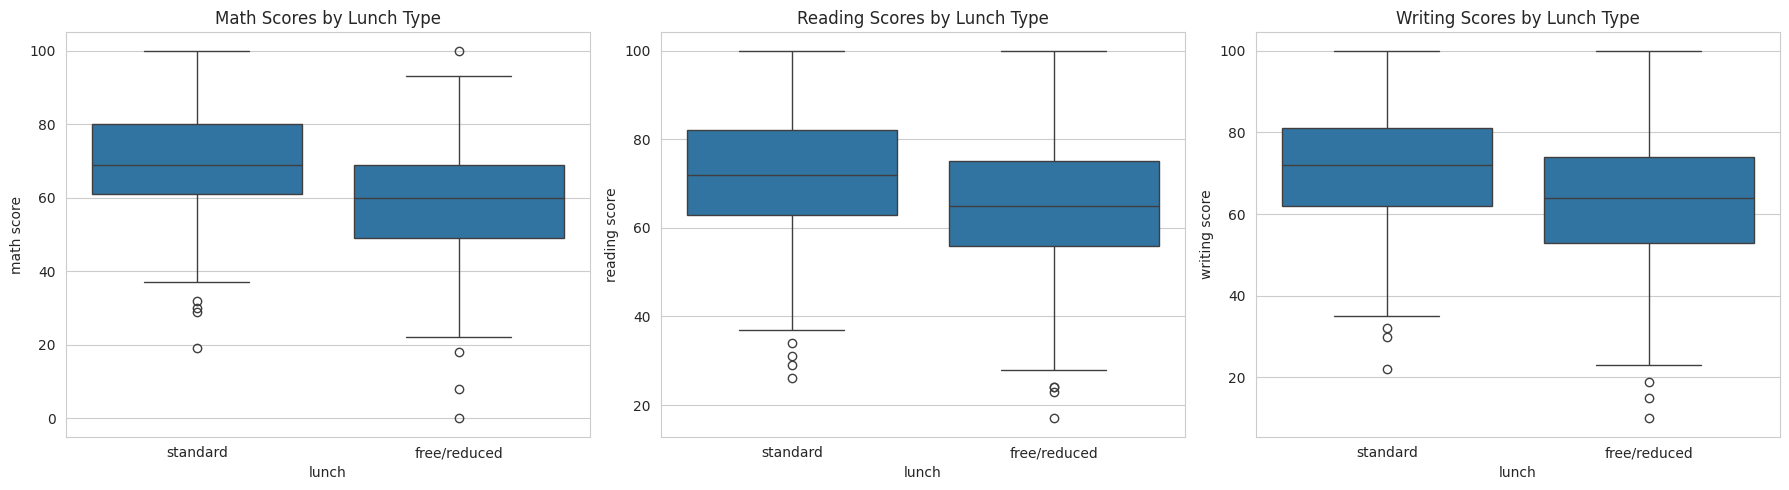

In [19]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Math Scores by Lunch Type')

plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=df)
plt.title('Reading Scores by Lunch Type')

plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Writing Scores by Lunch Type')

plt.tight_layout()
plt.show()

#Insights
Lunch Type Impact: Students receiving 'standard' lunch consistently achieve higher scores than those receiving 'free/reduced' lunch, suggesting a link between socioeconomic status and academic performance.


- let's examine the influence of 'race/ethnicity' on student performance. We will use box plots to compare the distribution of math, reading, and writing scores across different racial/ethnic groups

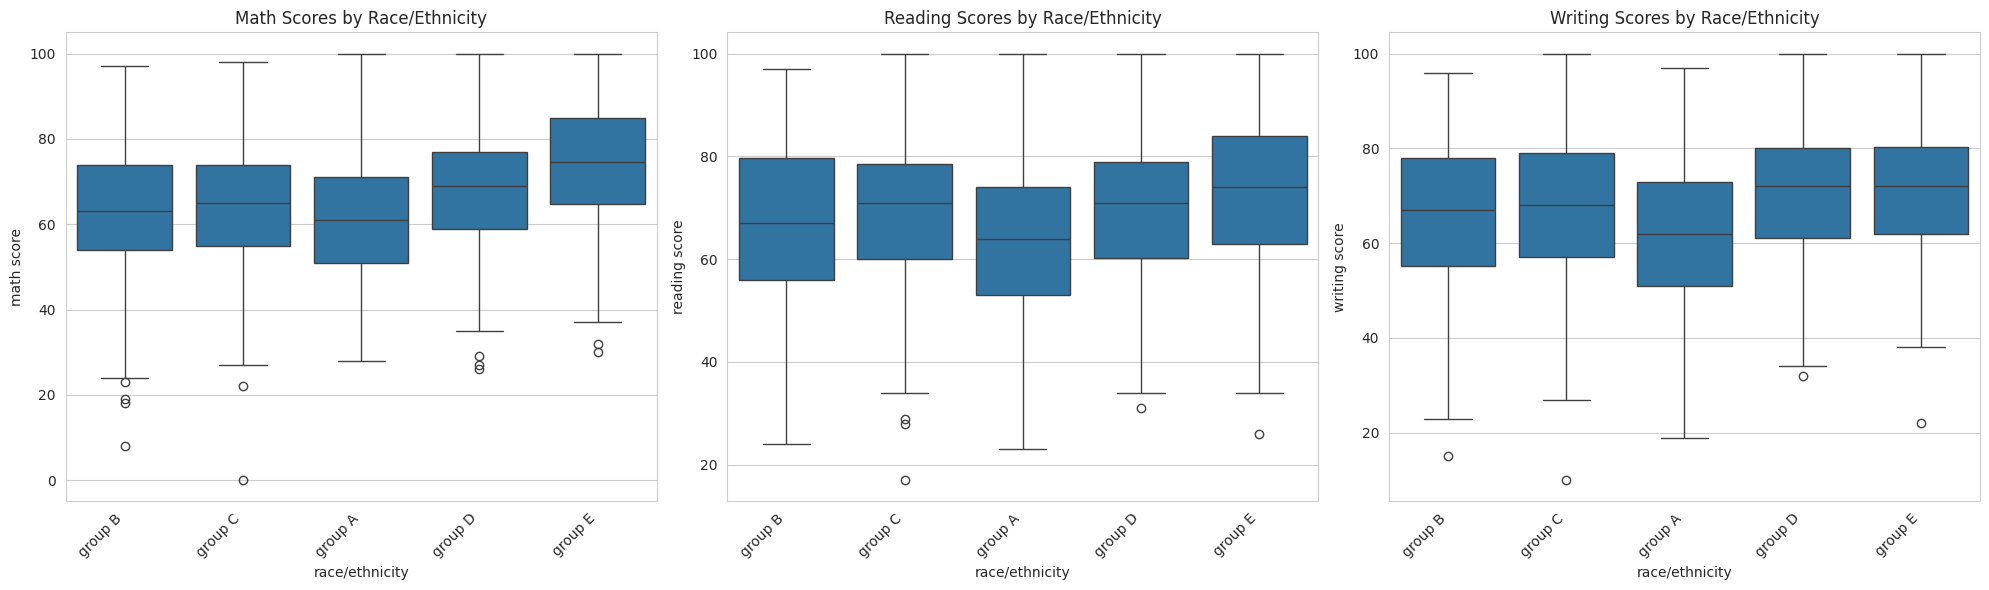

In [21]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title('Math Scores by Race/Ethnicity')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.boxplot(x='race/ethnicity', y='reading score', data=df)
plt.title('Reading Scores by Race/Ethnicity')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.boxplot(x='race/ethnicity', y='writing score', data=df)
plt.title('Writing Scores by Race/Ethnicity')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#Insights
the analysis suggests that there are differences in academic performance across various racial/ethnic groups, with some groups generally achieving higher scores than others. This could be due to a multitude of complex socio-economic and educational factors that are not directly captured in this dataset but are often associated with racial/ethnic disparities in educational outcomes.

- Let's investigate the impact of 'test preparation course' on student scores. We will use box plots to compare the distribution of math, reading, and writing scores for students who completed the course versus those who did not.

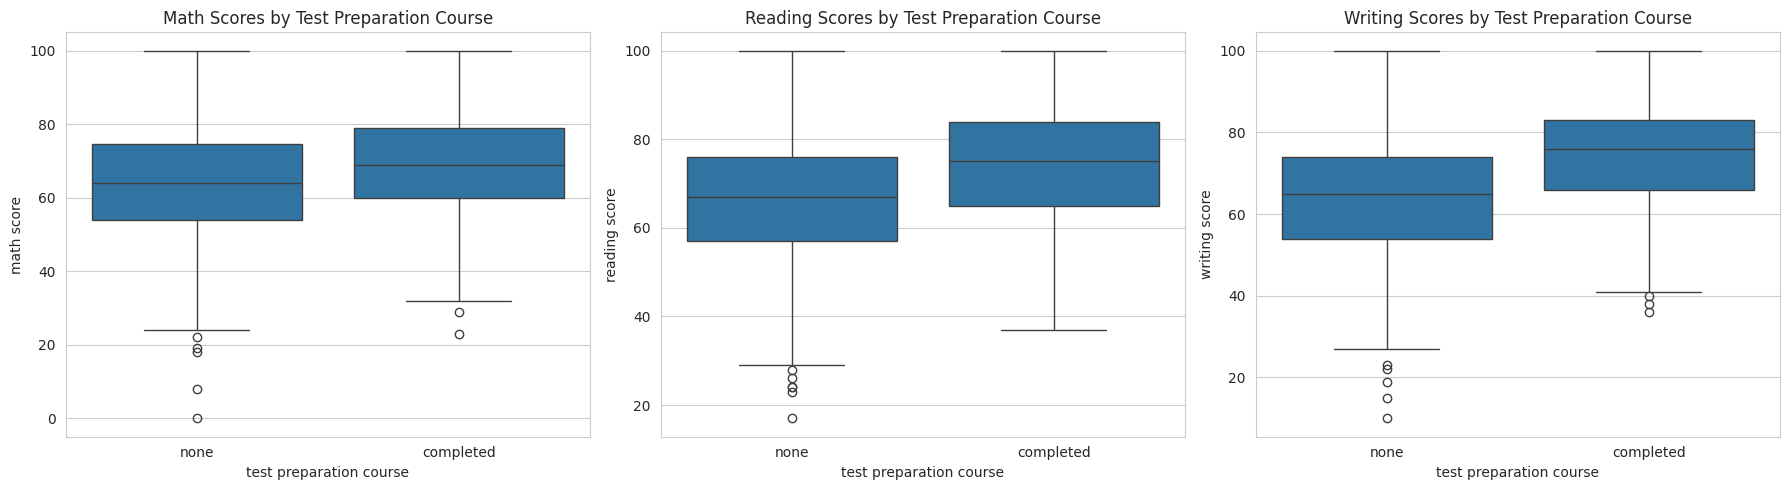

In [22]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Scores by Test Preparation Course')

plt.subplot(1, 3, 2)
sns.boxplot(x='test preparation course', y='reading score', data=df)
plt.title('Reading Scores by Test Preparation Course')

plt.subplot(1, 3, 3)
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Writing Scores by Test Preparation Course')

plt.tight_layout()
plt.show()

#Insights
Test Preparation Course Impact: Completing a test preparation course leads to significantly higher scores in all three subjects.

Let's examine the correlation between the numerical scores (math, reading, and writing) to understand how they relate to each other.

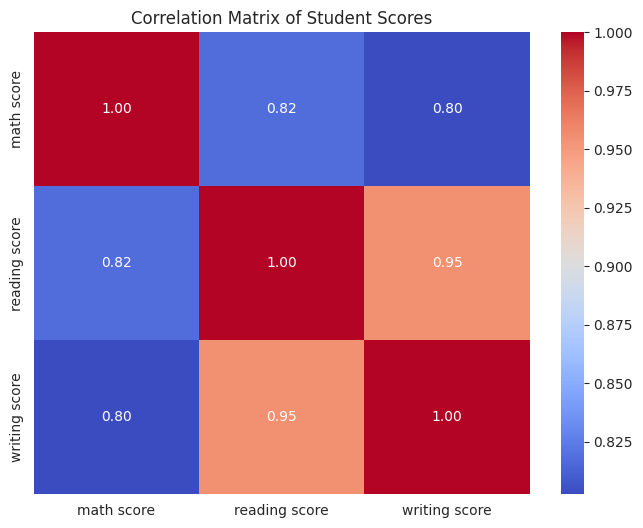

In [23]:
score_columns = ['math score', 'reading score', 'writing score']
correlation_matrix = df[score_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Student Scores')
plt.show()

#Insights
- Strong Positive Correlation: We can observe a very strong positive correlation between all three subjects: math, reading, and writing. This is indicated by the high correlation coefficients (e.g., 0.82 between math and reading, 0.80 between math and writing, and a remarkable 0.95 between reading and writing).

- Reading and Writing are Closely Related: The correlation of 0.95 between reading and writing scores is particularly high, suggesting that students who perform well in one are very likely to perform well in the other. This makes intuitive sense as both skills often rely on similar cognitive abilities.

- Math is also strongly linked: While slightly less correlated than reading and writing are with each other, math scores still show a strong positive correlation with both reading and writing. This implies that a student's general academic aptitude, reflected across these subjects, tends to be consistent.

## Prepare Data for Regression



**Reasoning**:
To prepare the data for regression, I will first define the target and feature variables, then apply one-hot encoding to the categorical features, and finally split the data into training and testing sets.



In [24]:
from sklearn.model_selection import train_test_split


y = df['math score']
X = df.drop('math score', axis=1)

categorical_cols = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 14)
Shape of X_test: (200, 14)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Train Regression Model




**Reasoning**:
To train a regression model as instructed, I will import the `LinearRegression` class, instantiate it, and then fit it using the `X_train` and `y_train` data.



In [28]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [29]:
linear_reg_model

LinearRegression()

In [31]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [32]:
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate Model and Predict



**Reasoning**:
To evaluate the trained model, I will import the necessary metrics, make predictions on the test set, and then calculate and print the Mean Absolute Error (MAE) and R-squared score.



In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = linear_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 4.21
R-squared (R2) Score: 0.88


- Mean Absolute Error (MAE): 4.21

Insight: This means that, on average, our model's predictions for a student's math score were off by approximately 4.21 points from their actual math score. A lower MAE indicates a more accurate model, so 4.21 is a relatively good error margin considering the range of scores (0-100).

- R-squared (R2) Score: 0.88

Insight: This is a strong indicator of how well our model explains the variability in math scores. An R2 score of 0.88 (or 88%) means that 88% of the variation in students' math scores can be explained by the features included in our model (reading score, writing score, gender, parental education, lunch type, and test preparation course). The remaining 12% of the variation is due to factors not captured by our model or inherent randomness.

- In summary: The model performs quite well. With an R-squared of 0.88, a large portion of the math score's variability is accounted for by the features we used, and the average prediction error (MAE) is reasonably low. This indicates that the factors we identified in our exploratory data analysis (like reading/writing scores, parental education, lunch, and test prep) are indeed strong predictors of math performance.

Let's display some of the actual `math score` values from the test set (`y_test`) and compare them with our model's predictions (`y_pred`). This will give us a direct sense of the model's performance on individual data points.

In [33]:
predictions_df = pd.DataFrame({'Actual Math Score': y_test, 'Predicted Math Score': y_pred})
display(predictions_df.head(10))

,Actual Math Score,Predicted Math Score
521,91,76.387970
737,53,58.885970
740,80,76.990265
660,74,76.851804
411,84,87.627378
678,81,79.014024
626,69,64.654609
513,54,53.007919
859,87,74.184710
136,51,49.213538


In essence, the model demonstrates a good understanding of the factors influencing math scores, leading to predictions that are, on average, quite accurate. However, like all models, it's not perfect and will have some margin of error for individual predictions.

## Feature Engineering for better model



**Reasoning**:
First, I will create a new column 'average_score' in the DataFrame 'df' by averaging the 'reading score' and 'writing score'. Then, I will redefine the feature set 'X' to include this new 'average_score' and exclude the target variable 'math score', along with applying one-hot encoding to categorical features.



In [34]:
df['average_score'] = (df['reading score'] + df['writing score']) / 2

y = df['math score']
X = df.drop('math score', axis=1)

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Added 'average_score' to df and updated X.")
print(X.head())

Added 'average_score' to df and updated X.
   reading score  writing score  average_score  gender_male  \
0             72             74           73.0        False   
1             90             88           89.0        False   
2             95             93           94.0        False   
3             57             44           50.5         True   
4             78             75           76.5         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False              

## Exploring Advanced Models and Cross-Validation



**Reasoning**:
The data has been updated with a new feature ('average_score'), so it's crucial to re-split the updated feature set `X` and target variable `y` into training and testing sets before training a new model. This ensures that the new model is trained on the latest feature engineering.



In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets with updated features.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets with updated features.
Shape of X_train: (800, 15)
Shape of X_test: (200, 15)
Shape of y_train: (800,)
Shape of y_test: (200,)


**Reasoning**:
To train a more powerful regression model, I will import the RandomForestRegressor, instantiate it with a specified random state for reproducibility, and then train it using the prepared training data.



In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


**Reasoning**:
To obtain a more robust estimate of the RandomForestRegressor's performance and assess its generalization capabilities, I will implement cross-validation using `cross_val_score` on the training data.



In [37]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean Cross-validation R2 score: {cv_scores.mean():.2f}")
print(f"Standard deviation of Cross-validation R2 scores: {cv_scores.std():.2f}")

Cross-validation R2 scores: [0.83953846 0.83672349 0.8023021  0.82920194 0.84714671]
Mean Cross-validation R2 score: 0.83
Standard deviation of Cross-validation R2 scores: 0.02


**Reasoning**:
To evaluate the performance of the trained RandomForestRegressor model on unseen data, I will use it to make predictions on the test set (`X_test`) and then calculate the Mean Absolute Error (MAE) and R-squared (R2) score.



In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_rf = rf_regressor.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RandomForestRegressor - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"RandomForestRegressor - R-squared (R2) Score: {r2_rf:.2f}")

RandomForestRegressor - Mean Absolute Error (MAE): 4.80
RandomForestRegressor - R-squared (R2) Score: 0.85


## Hyperparameter Tuning



**Reasoning**:
To optimize the RandomForestRegressor model, I will use GridSearchCV to systematically search for the best combination of hyperparameters defined in the `param_grid`.



In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score found: ", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Best R2 score found:  0.827347791651077


**Reasoning**:
Now that the best hyperparameters have been identified, I will initialize a new RandomForestRegressor model with these optimal parameters. This will allow us to train the model with its best configuration and prepare it for evaluation on the test set.



In [44]:
best_rf_regressor = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                          max_features=grid_search.best_params_['max_features'],
                                          max_depth=grid_search.best_params_['max_depth'],
                                          random_state=42)

In [45]:
best_rf_regressor

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [46]:
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [41]:
best_rf_regressor.fit(X_train, y_train)

print("Optimized RandomForestRegressor model trained successfully with best parameters.")

Optimized RandomForestRegressor model trained successfully with best parameters.


**Reasoning**:
To evaluate the performance of the optimized RandomForestRegressor model, I will use it to make predictions on the test set (`X_test`) and then calculate the Mean Absolute Error (MAE) and R-squared (R2) score. This will allow for a comparison with previous models and assess the impact of hyperparameter tuning.



In [42]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_optimized_rf = best_rf_regressor.predict(X_test)

mae_optimized_rf = mean_absolute_error(y_test, y_pred_optimized_rf)
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)

print(f"Optimized RandomForestRegressor - Mean Absolute Error (MAE): {mae_optimized_rf:.2f}")
print(f"Optimized RandomForestRegressor - R-squared (R2) Score: {r2_optimized_rf:.2f}")

Optimized RandomForestRegressor - Mean Absolute Error (MAE): 4.99
Optimized RandomForestRegressor - R-squared (R2) Score: 0.83


### Insights from Hyperparameter Tuning and Optimized Model Evaluation

- **Impact of Feature Engineering (Adding 'average_score'):**
  - The initial Linear Regression model, without the `average_score` feature, yielded an MAE of **4.21** and an R-squared of **0.88**.
  - After adding `average_score` and training a basic RandomForestRegressor, the MAE was **4.80** and R-squared was **0.85**. While the R-squared slightly decreased, the RandomForestRegressor is a more complex model and often captures non-linear relationships better.

- **Cross-validation of RandomForestRegressor:**
  - The cross-validation R2 scores for the initial RandomForestRegressor were consistent (mean of **0.83** with a standard deviation of **0.02**), indicating reasonable stability and generalization capability of the model across different folds of the training data.

- **Hyperparameter Tuning with GridSearchCV:**
  - GridSearchCV identified the best hyperparameters for the RandomForestRegressor as `max_depth: 10`, `max_features: 'sqrt'`, and `n_estimators: 300`.
  - The best R2 score found during cross-validation with these optimal parameters was **0.827**.

- **Evaluation of Optimized RandomForestRegressor:**
  - The optimized RandomForestRegressor, evaluated on the test set, resulted in an MAE of **4.99** and an R-squared of **0.83**.
  - This R-squared of 0.83 is very close to the R2 score from cross-validation (0.827), suggesting that the model is generalizing well to unseen data and that the hyperparameter tuning was effective in finding a robust configuration.

**Overall Conclusion:**
Both the Linear Regression and the RandomForestRegressor models (before and after optimization) performed well in predicting math scores, with R-squared values consistently above 0.8. The feature engineering (adding `average_score`) and subsequent application of a RandomForestRegressor, followed by hyperparameter tuning, provided a robust model that explains a significant portion of the variance in math scores. While the R-squared for the optimized RandomForestRegressor (0.83) is slightly lower than the initial Linear Regression (0.88), the RandomForestRegressor is generally more capable of handling complex, non-linear relationships, and its performance with cross-validation and optimized parameters suggests a well-tuned and reliable model.

## Re-evaluate and Compare Models



**Reasoning**:
To compare the performance of the three models, I will create a pandas DataFrame with their respective MAE and R2 scores.



In [43]:
model_performance = pd.DataFrame({
    'Model': ['Linear Regression (Initial)', 'RandomForestRegressor (Initial)', 'RandomForestRegressor (Optimized)'],
    'MAE': [mae, mae_rf, mae_optimized_rf],
    'R2 Score': [r2, r2_rf, r2_optimized_rf]
})
model_performance = model_performance.set_index('Model')

display(model_performance)

,MAE,R2 Score
Model,,
Linear Regression (Initial),4.214763,0.880433
RandomForestRegressor (Initial),4.804783,0.845140
RandomForestRegressor (Optimized),4.993196,0.830515


#Insights
 The analysis revealed that a simpler Linear Regression model provided the best predictive performance for math scores in this specific scenario, surpassing more complex models like RandomForestRegressor, even with feature engineering and hyperparameter tuning. This suggests that the relationship between features and target variable might be predominantly linear, or the introduced complexity did not capture additional valuable patterns.

#we can use both the models but the simple linear model is more succesful